In [1]:
from google.colab import drive

drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My Drive/Kaggle_Data/P2P lending/

/content/gdrive/My Drive/Kaggle_Data/P2P lending


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
# Importing Classing for Evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve, auc,roc_auc_score

data =  pd.read_csv("data_clean.csv",index_col=False)
X_train, X_test, y_train, y_test = train_test_split(data.drop('Non-Default_Default',axis=1).values,data['Non-Default_Default'].values,test_size=0.2, random_state=42)


# Definding Evaluation function for binary classification problem

In [4]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve, auc,roc_auc_score
def evbiclas(model,cr=0):
  preds = model.predict(X_test)
  print('\n'+'\033[1m'+type(model).__name__+'\033[0;0m')    
  print("----------------------------------")
  print("\nTrain Accuracy:","{:.2f}".format(model.score(X_train, y_train)*100))

  print("\nTest Accuracy:", "{:.2f}".format(model.score(X_test, y_test)*100))

  print("\nClassification report:")
  print(classification_report(preds, y_test))

  print("\nConfusion matrix:")
  # Creating the confusion matrix
  cm = confusion_matrix(preds, y_test)
  # Assigning columns names
  cm_df = pd.DataFrame(cm, 
              columns = ['Predicted Positive','Predicted Negative'],
              index = [ 'Actual Positive','Actual Negative'])
  print(cm_df)
  print("----------------------------------")
  sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
  print('\nSensitivity : ',"{:.2f}".format(sensitivity1*100))

  specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
  print('Specificity : ', "{:.2f}".format(specificity1*100))
  print("\nROC / AUC:")


  probabilities = model.predict_proba(X_test)
  probabilities = probabilities[:, 1]  # keep probabilities for first class only
        
  # Compute the ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, probabilities)    
  plt.figure(figsize = (10,7))
  plt.title(f"ROC Curve with AUC = {str(round(roc_auc_score(y_test, probabilities),3))}", fontsize=22)
  # Plot the "dumb model" line
  plt.plot([0, 1], [0, 1], linestyle='--',label='baseline')
    
  # Plot the model line
  plt.plot(fpr, tpr, marker='.',label='ROC Curve')
  plt.text(0.75, 0.25, "AUC: " + str(round(roc_auc_score(y_test, probabilities),3)),fontsize=18)
    
  plt.ylabel('Sensitivity', fontsize=18)
  plt.xlabel('1 - Specificity', fontsize=18)

  plt.legend(fontsize=16)
    
  # show the plot
  plt.show();




  print("\n----------------------------------")
  print("\nCross Validation 10K fold Result")
  print('\n')
  if type(cr)==int:
    print('\033[1m**Cross validation Result Not avaible**\033[0;0m')
  else:
    ud=1
    for i in cr:
      print('K',ud,':',"{:.2f}".format(i*100))
      ud=ud+1
  print("\n----------------------------------")
  print('The Model Parameters:','\n',model.get_params())

# **1-Logistic Regression**

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
#crv=cross_val_score(model, data.drop('Non-Default_Default',axis=1).values, data['Non-Default_Default'].values, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()


LogisticRegression
----------------------------------

Train Accuracy: 68.02

Test Accuracy: 67.99

Classification report:
              precision    recall  f1-score   support

           0       0.73      0.66      0.69     63458
           1       0.63      0.70      0.67     52873

    accuracy                           0.68    116331
   macro avg       0.68      0.68      0.68    116331
weighted avg       0.68      0.68      0.68    116331


Confusion matrix:
                 Predicted Positive  Predicted Negative
Actual Positive               42134               21324
Actual Negative               15912               36961
----------------------------------

Sensitivity :  66.40
Specificity :  69.91

ROC / AUC:


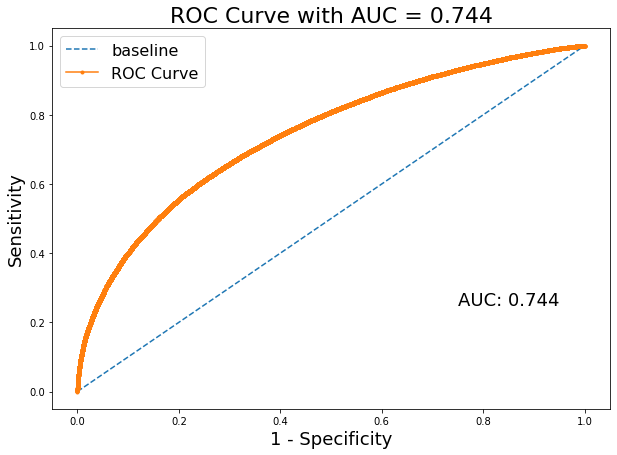


----------------------------------

Cross Validation 10K fold Result


**Cross validation Result Not avaible**

----------------------------------
The Model Parameters: 
 {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [6]:
evbiclas(lr)

# **2-Decision Tree**

In [8]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

#cr=cross_val_score(model, data.drop('Non-Default_Default',axis=1).values, data['Non-Default_Default'].values, cv=10)

DecisionTreeClassifier()


DecisionTreeClassifier
----------------------------------

Train Accuracy: 100.00

Test Accuracy: 58.89

Classification report:
              precision    recall  f1-score   support

           0       0.59      0.59      0.59     57838
           1       0.59      0.59      0.59     58493

    accuracy                           0.59    116331
   macro avg       0.59      0.59      0.59    116331
weighted avg       0.59      0.59      0.59    116331


Confusion matrix:
                 Predicted Positive  Predicted Negative
Actual Positive               34031               23807
Actual Negative               24015               34478
----------------------------------

Sensitivity :  58.84
Specificity :  58.94

ROC / AUC:


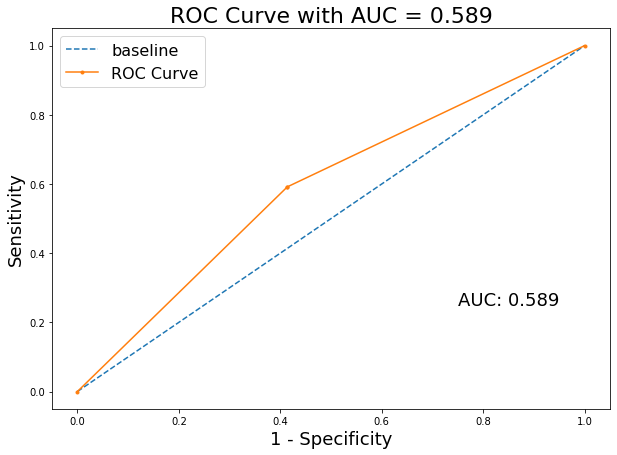


----------------------------------

Cross Validation 10K fold Result


**Cross validation Result Not avaible**

----------------------------------
The Model Parameters: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [9]:
evbiclas(dt)

The model is **overfitting** on the data however **the test and cross validation** result shows the true accuracy for the model which is **59%**

# **3- Random Forest**

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
#cr=cross_val_score(model, data.drop('Non-Default_Default',axis=1).values, data['Non-Default_Default'].values, cv=10)

RandomForestClassifier()


RandomForestClassifier
----------------------------------

Train Accuracy: 100.00

Test Accuracy: 67.32

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.66      0.69     64040
           1       0.62      0.69      0.66     52291

    accuracy                           0.67    116331
   macro avg       0.67      0.68      0.67    116331
weighted avg       0.68      0.67      0.67    116331


Confusion matrix:
                 Predicted Positive  Predicted Negative
Actual Positive               42032               22008
Actual Negative               16014               36277
----------------------------------

Sensitivity :  65.63
Specificity :  69.38

ROC / AUC:


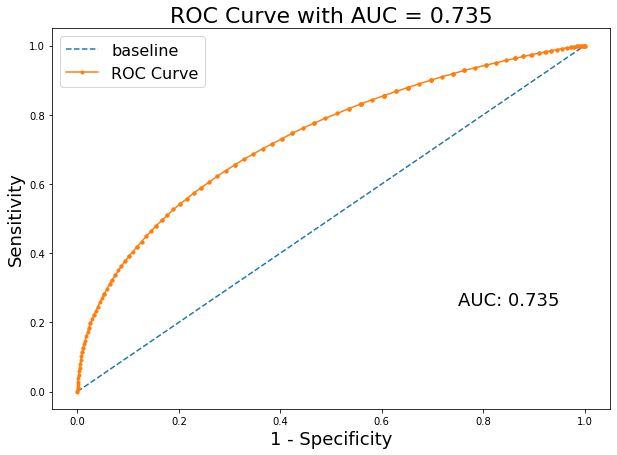


----------------------------------

Cross Validation 10K fold Result


**Cross validation Result Not avaible**

----------------------------------
The Model Parameters: 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [11]:
evbiclas(rf)

# **4- LightLGM**

Light Gradient Boosted Machine, or LightGBM for short, is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.

In [12]:
import lightgbm as lgb
gb = lgb.LGBMClassifier()
gb.fit(X=X_train, y=y_train)


LGBMClassifier()


LGBMClassifier
----------------------------------

Train Accuracy: 68.46

Test Accuracy: 68.26

Classification report:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70     63513
           1       0.64      0.70      0.67     52818

    accuracy                           0.68    116331
   macro avg       0.68      0.68      0.68    116331
weighted avg       0.69      0.68      0.68    116331


Confusion matrix:
                 Predicted Positive  Predicted Negative
Actual Positive               42316               21197
Actual Negative               15730               37088
----------------------------------

Sensitivity :  66.63
Specificity :  70.22

ROC / AUC:


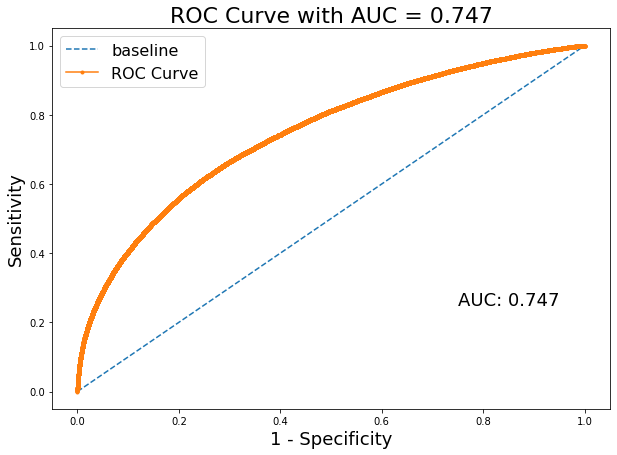


----------------------------------

Cross Validation 10K fold Result


**Cross validation Result Not avaible**

----------------------------------
The Model Parameters: 
 {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [13]:
evbiclas(gb)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

Text(0.5, 0, '1 - Specificity')

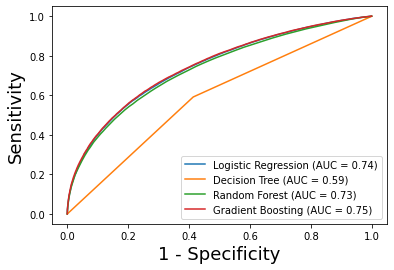

In [16]:
from sklearn.metrics import plot_roc_curve

disp=plot_roc_curve(lr,X_test,y_test,name='Logistic Regression')
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_,name='Decision Tree');
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_,name='Random Forest');
plot_roc_curve(gb,X_test,y_test,ax=disp.ax_,name='Gradient Boosting');


plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)